# Setup
[Project Description](https://docs.google.com/document/d/1U7U4PN39LvbMh9_PGCAjtJU7BS_omKqtc081Qqbcvlg/edit)

## imports

In [1]:
import cv2
import glob
import numpy as np
import sys
print(sys.version)
print("OpenCV version :  {0}".format(cv2.__version__))

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
OpenCV version :  4.2.0


In [2]:
import matplotlib.pyplot as plt
def plot_figures(figures, nrows=1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,10))
    if(nrows > 1 or ncols > 1):
        for ind,title in enumerate(figures):
            axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
            axeslist.ravel()[ind].set_title(title)
            axeslist.ravel()[ind].set_axis_off()
        plt.tight_layout() # optional
    else:
        for ind,title in enumerate(figures):
            axeslist.imshow(figures[title], cmap=plt.gray())
            axeslist.set_title(title)
            axeslist.set_axis_off()


## Camera parameter matrices

In [3]:
left_intrinsic = np.array([[423.27381306, 0, 341.34626532],
                           [0, 421.27401756, 269.28542111],
                           [0, 0, 1]])

right_intrinsic = np.array([[420.91160482, 0, 352.16135589],
                            [0, 418.72245958, 264.50726699],
                            [0, 0, 1]])

distCoeffs_left = np.array([-0.43394157423038077, 0.26707717557547866,
                             -0.00031144347020293427, 0.0005638938101488364,
                             -0.10970452266148858])
distCoeffs_right = np.array([-0.4145817681176909, 0.19961273246897668,
                             -0.00014832091141656534, -0.0013686760437966467,
                             -0.05113584625015141])

In [12]:
left_intrinsic

array([[423.27381306,   0.        , 341.34626532],
       [  0.        , 421.27401756, 269.28542111],
       [  0.        ,   0.        ,   1.        ]])

# Step 1

In [ ]:
left_ = [cv2.imread(image, 0) for image in sorted(glob.glob("../../images/task_5/left_*.png"))]
right_ = [cv2.imread(image, 0) for image in sorted(glob.glob("../../images/task_5/right_*.png"))]

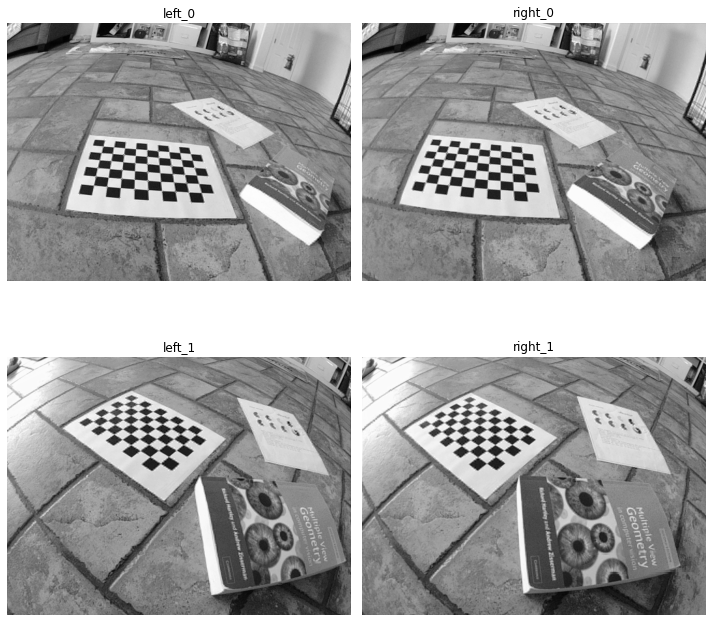

In [10]:
plot_figures({'left_0': left_[0], 'right_0': right_[0], 'left_1': left_[1], 'right_1': right_[1]}, 2, 2)

# Step 2

In [13]:
def undistortImage(img, mtx, distCoeffs):
    h,  w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,distCoeffs,(w,h),1,(w,h))

    dst = cv2.undistort(img, mtx, distCoeffs, None, newcameramtx)

    # crop the image
    x,y,w,h = roi
    return dst[y:y+h, x:x+w]

In [21]:
distCoeffs_left-distCoeffs_right

array([-0.01935981,  0.06746444, -0.00016312,  0.00193257, -0.05856868])

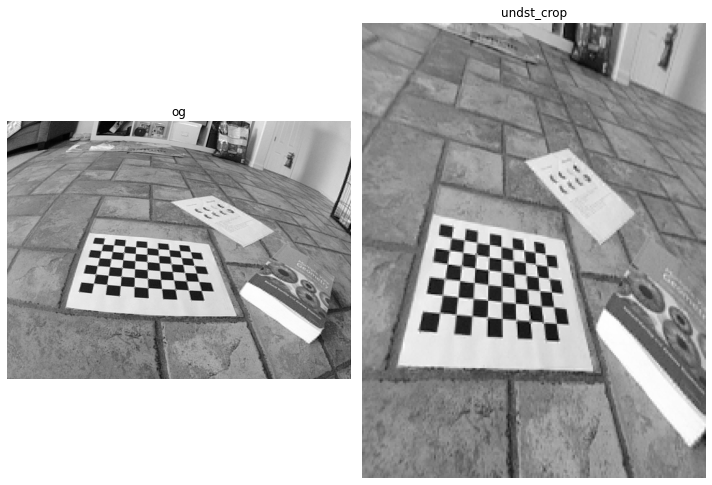

In [20]:
temp = undistortImage(left_[0], left_intrinsic, distCoeffs_left)
plot_figures({'og':left_[0], 'undst_crop':temp},1,2)

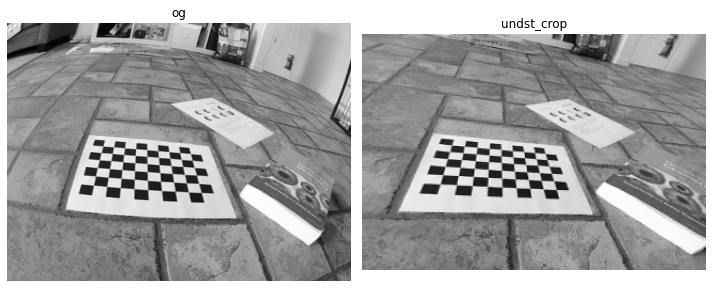

In [31]:
temp = undistortImage(left_[0], left_intrinsic, distCoeffs_right)
plot_figures({'og':left_[0], 'undst_crop':temp},1,2)

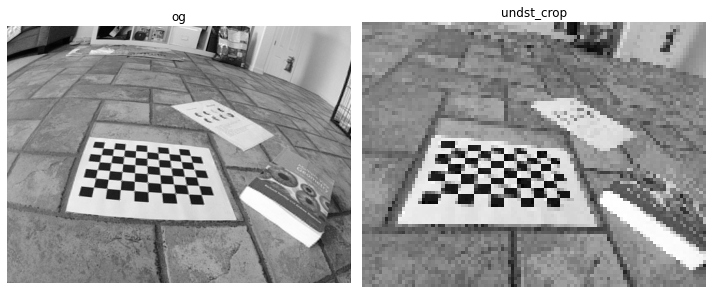

In [22]:
temp = undistortImage(left_[0], right_intrinsic, distCoeffs_right)
plot_figures({'og':left_[0], 'undst_crop':temp},1,2)

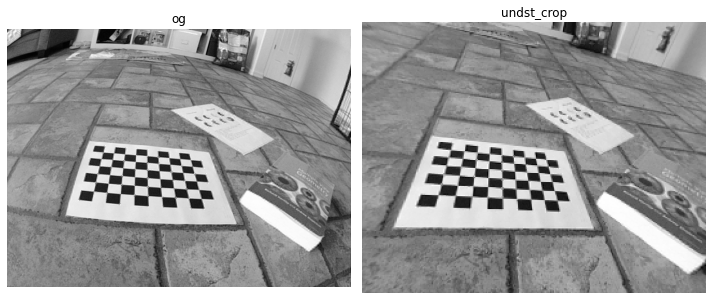

In [24]:
temp = undistortImage(left_[0], right_intrinsic, distCoeffs_left)
plot_figures({'og':left_[0], 'undst_crop':temp},1,2)

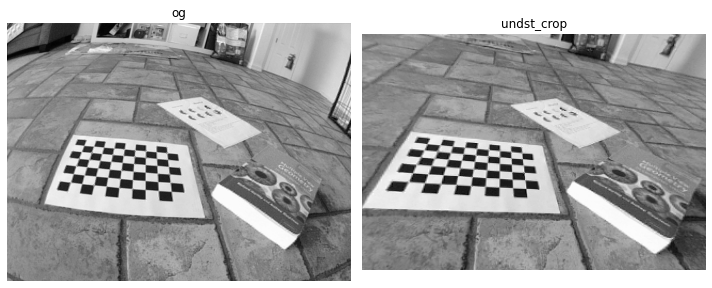

In [27]:
temp = undistortImage(right_[0], left_intrinsic, distCoeffs_right)
plot_figures({'og':right_[0], 'undst_crop':temp},1,2)

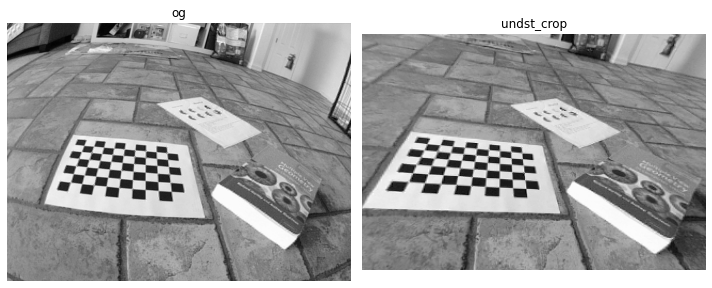

In [34]:
temp = undistortImage(right_[0], left_intrinsic, distCoeffs_right)
plot_figures({'og':right_[0], 'undst_crop':temp},1,2)

In [35]:
temp.shape

(222, 323)

In [ ]:
plot_figures({'left_0': left_[0], 'right_0': right_[0], 'left_1': left_[1], 'right_1': right_[1]}, 2, 2)